In [1]:
import pandas as pd
import matplotlib.pyplot as plt

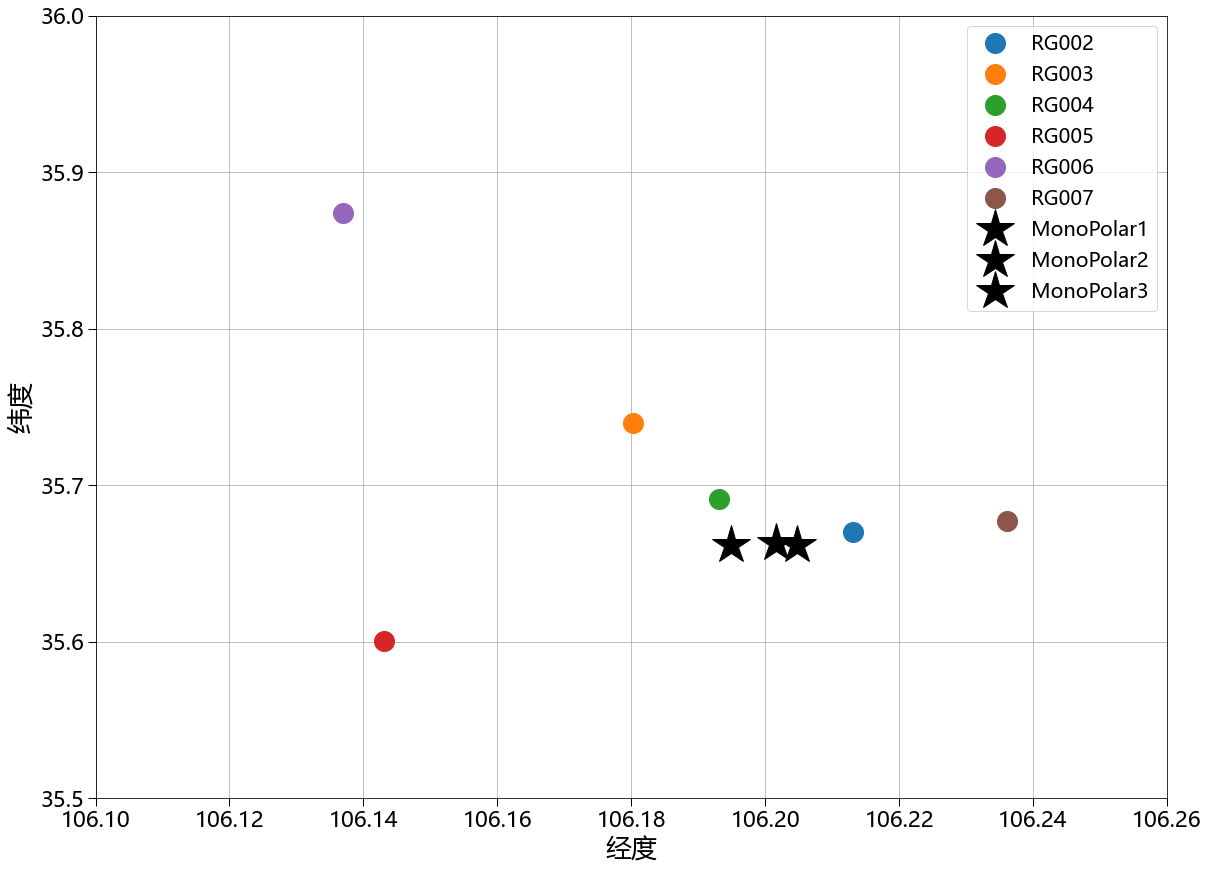

In [2]:
plt.figure(figsize=(6.4 * 3, 4.8 * 3))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.ylabel('纬度', fontdict={'weight': 'normal','size': 26})
plt.xlabel('经度', fontdict={'weight': 'normal','size': 26})
plt.ylim(35.50, 36.00)
plt.xlim(106.10, 106.26)
plt.grid(True)
plt.tick_params(width=1.0, length=8, labelsize=22)
info = pd.read_excel(r"E:\rainfall\Location_based_analysis\under_wind\data\lps\StationInfo_lps.xlsx")
info = info[:].reset_index()
station, lon, lat = info['台站号'], info['经度'], info['纬度']
for j in range(6):
    plt.plot(lon[j], lat[j], 'o', markersize=20, label=station[j])
plt.plot(lon[10], lat[10], '*', c='k', label=station[10], markersize=40)
plt.plot(lon[11], lat[11], '*', c='k', label=station[11], markersize=40)
plt.plot(lon[12], lat[12], '*', c='k', label=station[12], markersize=40)
plt.legend(loc=1, markerscale=1,fontsize=20)
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\lps_station.png")

## 插值

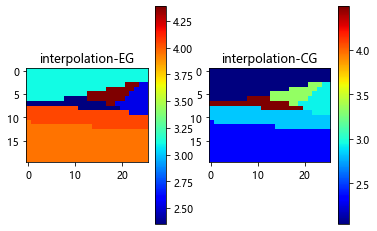

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


points = np.array([[35.67027778,106.2130556],[35.74,106.1802778],[35.69111111,106.1930556],
[35.60027778,106.1430556],[35.87416667,106.1369444],[35.67722222,106.2361111]]) #real

values = np.array([4.386283687,4.045162277,2.352402512,3.108336594,3.955585768,2.541928102])   
valuse_CG = np.array([3.335749317,2.83517702,4.491484044,2.042234984,2.330282871,2.935451368])
xi,yi = np.mgrid[35.5:36.0:20j, 106.10:106.26:26j]


grid = griddata(points, values, (xi, yi), method="nearest", fill_value=0)
grid_CG =  griddata(points, valuse_CG, (xi, yi), method="nearest", fill_value=0)


plt.subplot(1, 2, 1)
plt.title("interpolation-EG")
plt.imshow(grid, cmap='jet')  # contourf jet gray
plt.colorbar()

plt.subplot(1,2,2)
plt.title("interpolation-CG")
plt.imshow(grid_CG, cmap='jet')  # contourf jet gray
plt.colorbar()
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\lps_ninterpolate.png")
plt.show()
#grid_CG


## on-off得到张量，画heatmap

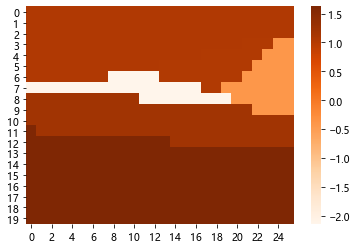

In [4]:
import seaborn as sns

R1 = grid-grid_CG

fig = plt.figure()
sns_plot = sns.heatmap(R1,cmap='Oranges')
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\lps_heatmap.png")
plt.show()